# **Python Midterm Assignment**

By: Prottoy and Laura 

#Data Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
tweet_data=pd.read_csv('/content/us_election_tweets.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
tweet_data.describe()

,Unnamed: 0,timezone,user_id,replies_count,retweets_count,likes_count,retweet,video,retweet_date,translate,trans_src,trans_dest
count,128153.000000,128153.000000,1.281530e+05,128140.000000,128140.000000,128140.000000,0.0,128140.000000,0.0,0.0,0.0,0.0
mean,64077.000000,529.987601,3.919483e+17,1.123841,2.584813,9.024645,NaN,0.122772,NaN,NaN,NaN,NaN
std,36994.728861,2.562688,5.286499e+17,31.522378,106.543898,268.685238,NaN,0.328177,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,32039.000000,530.000000,1.563629e+08,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,64077.000000,530.000000,1.851675e+09,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
75%,96115.000000,530.000000,9.680000e+17,0.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN
max,128153.000000,530.000000,1.320000e+18,9557.000000,27533.000000,63052.000000,NaN,1.000000,NaN,NaN,NaN,NaN


In [ ]:
tweet_data.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,link,retweet,quote_url,video,reply_to,retweet_date,translate,trans_src,trans_dest
0,1,1.32E+18,1.32E+18,2020-10-28 19:32:28 IST,10/28/2020,19:32:28,530,60666680.0,mcflyroro,Róisín ❤️,NaN,Hi if you want Americans to infuriate you in t...,en,[],[],[],0.0,0.0,0.0,https://twitter.com/mcflyroro/status/132145227...,NaN,https://twitter.com/niallofficial/status/13214...,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
1,2,1.32E+18,1.32E+18,2020-10-28 19:32:10 IST,10/28/2020,19:32:10,530,186532092.0,omar_allam_,Omar Allam,NaN,@armstrongcbc No surprise. It's going to be a ...,en,['armstrongcbc'],[],[],0.0,0.0,0.0,https://twitter.com/Omar_Allam_/status/1321452...,NaN,NaN,0.0,"{'user_id': '344254333', 'username': 'armstron...",NaN,NaN,NaN,NaN
2,3,1.32E+18,1.32E+18,2020-10-28 19:32:06 IST,10/28/2020,19:32:06,530,915033138.0,bogwollox,J L,NaN,I can’t wait till after the US election so I c...,en,[],[],[],0.0,0.0,0.0,https://twitter.com/Bogwollox/status/132145218...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
3,4,1.32E+18,1.32E+18,2020-10-28 19:32:05 IST,10/28/2020,19:32:05,530,49656209.0,ejbeals,Emma Beals,NaN,"America as a foreign country, by foreign corre...",en,[],['https://www.newyorker.com/video/watch/the-ne...,[],0.0,1.0,1.0,https://twitter.com/ejbeals/status/13214521782...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
4,5,1.32E+18,1.32E+18,2020-10-28 19:32:01 IST,10/28/2020,19:32:01,530,408109805.0,pinkladyh,Miss Old Soul,NaN,Wow. I guess if you want actual journalism and...,en,['skynewsaust'],['https://youtu.be/R8BfTziM540'],[],0.0,0.0,0.0,https://twitter.com/PinkLadyH/status/132145216...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN


In [ ]:
tweets=tweet_data['tweet']

tweets

0         Hi if you want Americans to infuriate you in t...
1         @armstrongcbc No surprise. It's going to be a ...
2         I can’t wait till after the US election so I c...
3         America as a foreign country, by foreign corre...
4         Wow. I guess if you want actual journalism and...
                                ...                        
128148    @MaximeBernier This setting the table for the ...
128149    Donald Trump seeks fast-track approval of Oxfo...
128150    THIS is what we need DAILY in the media, folks...
128151    He can get it inject to himself Rush delivered...
128152    As expected: “Trump considers fast-tracking UK...
Name: tweet, Length: 128153, dtype: object

# **Part A:**

1) Write a function lower_tweet(tw) that takes as an input tw, a tweet string. Then, return the same string all in lowercase. 

In [ ]:
def lower_tweet(tw):
  lowercase_tweet = tw.lower()
  return lowercase_tweet

example_tweet = lower_tweet(tweets[5])
example_tweet 

'how does the rest of the world feel about the us election? like the us, polarized - the guardian  https://t.co/ra2zeqivuu via @googlenews'

In [ ]:
tweet_data['lowercase_tweets'] = tweet_data['tweet'].str.lower()
tweet_data['lowercase_tweets']

0         hi if you want americans to infuriate you in t...
1         @armstrongcbc no surprise. it's going to be a ...
2         i can’t wait till after the us election so i c...
3         america as a foreign country, by foreign corre...
4         wow. i guess if you want actual journalism and...
                                ...                        
128148    @maximebernier this setting the table for the ...
128149    donald trump seeks fast-track approval of oxfo...
128150    this is what we need daily in the media, folks...
128151    he can get it inject to himself rush delivered...
128152    as expected: “trump considers fast-tracking uk...
Name: lowercase_tweets, Length: 128153, dtype: object

In [ ]:
tweet_data['lowercase_tweets'] = tweet_data.lowercase_tweets.astype(str)

2) Write a function clean_data(tw) that takes in as input tw, a tweet string, cleans it by removing all punctuations and returns the cleaned tweet as output . (The function must have a return statement) 

GREAT SUCCESS

In [ ]:
def clean_data(tw):
  punctuations = '''!()-[]{};:'"\,<>./?@#+=$%^&*_~'''

  tw.replace("’", "")

  tw.replace('“', '')

  no_punct = ""
  for char in tw:
   if char not in punctuations:
       no_punct = no_punct + char

  return no_punct

In [ ]:
tweet1=clean_data(tweets[1])

tweet1

'armstrongcbc No surprise Its going to be a volatile few weeks in the market what with the USElection and a lot more earnings results to come'

In [ ]:
tweet_data["nopunct_lower_tweets"] = tweet_data['lowercase_tweets'].apply(clean_data)


tweet_data["nopunct_lower_tweets"]

0         hi if you want americans to infuriate you in t...
1         armstrongcbc no surprise its going to be a vol...
2         i can’t wait till after the us election so i c...
3         america as a foreign country by foreign corres...
4         wow i guess if you want actual journalism and ...
                                ...                        
128148    maximebernier this setting the table for the u...
128149    donald trump seeks fasttrack approval of oxfor...
128150    this is what we need daily in the media folks ...
128151    he can get it inject to himself rush delivered...
128152    as expected “trump considers fasttracking uk c...
Name: nopunct_lower_tweets, Length: 128153, dtype: object

In [ ]:
tweet_data["nopunct_lower_tweets"][12]

'if you haven’t voted in the us election yet and you’re eligible please bring in your mail in or vote in person there’s a chance your ballot won’t be counted if received after election day   httpstcorzrpsblfyz  httpstcovh6g9c9pww'

In [ ]:
tweet_data['nopunct_lower_tweets'] = tweet_data.nopunct_lower_tweets.astype(str)

3) Write a function remove_stop_words(tw) that takes as input tw, a tweet string line, and returns the cleaned (stop words removed) version of the tweet as a string. Use the stop_words.txt file for this section. Note that before attempting to remove the stop words, all punctuations should be removed from the lower case tweet. (The function must have a return statement.)

In [ ]:
#Converts to string 
def remove_stop_words(tw):
  with open("/content/stop_words.txt", "r") as my_stopwords:
    stopwords_list = my_stopwords.read()
    tw_list = tw.split(' ')
    new_list = []
    new_string = ""
    for i in tw_list: 
      if i not in stopwords_list:
        new_list.append(i)
      else:
        pass 
      my_stopwords.close
  for j in new_list: 
        new_string = new_string + " " + j 
  return new_string 

In [ ]:
tweet_data['clean_text'] = tweet_data["nopunct_lower_tweets"].apply(remove_stop_words)

In [ ]:
tweet_data['clean_text']

0          americans infuriate comments realise doesn’t ...
1          armstrongcbc surprise going volatile weeks ma...
2          can’t wait election fun trump supporters remi...
3          america foreign country foreign correspondent...
4          wow guess journalism coverage election going ...
                                ...                        
128148     maximebernier setting table election rigging ...
128149     donald trump seeks fasttrack approval oxford ...
128150     daily folks climatecrisis front center doubt ...
128151     inject rush delivered vaccines dangerous dead...
128152     expected “trump considers fasttracking uk cov...
Name: clean_text, Length: 128153, dtype: object

4) Write a function, bag_of_words(tw), that takes as input a tweet and creates a bag-of-words for it. A bag-of-words is a proper data structure that lists the number of times a word occurs in each tweet (10%). When called on a string: drink forgotten table drink, bag_of_words should return a proper Python data structure: 'drink': 2, 'forgotten': 1, 'table': 1

GREAT SUCCESS

In [ ]:
def bag_of_words(tw):
  twlist=tw.split(' ')
  twset=set(twlist)
  bag=[]

  for i in twset:
    count=twlist.count(i)
    bag.append({i : count})

  return bag

In [ ]:
cleaned_bag = bag_of_words(tweet_data.clean_text[1])
cleaned_bag

[{'': 1},
 {'armstrongcbc': 1},
 {'going': 1},
 {'market': 1},
 {'uselection': 1},
 {'weeks': 1},
 {'lot': 1},
 {'earnings': 1},
 {'volatile': 1},
 {'surprise': 1}]

In [ ]:
tweet_data['bag_of_words'] = tweet_data["clean_text"].apply(bag_of_words)

# **Part B:**

1) Write a function candidate_relation(tw), that takes as an input a tweet and decides if the tweet is about which candidate (you can search for candidate’s names) (10%). When called on a string:
Trump has a campaign today at Florida, candidate_relation should return: T
Polls aren’t consistent with Biden’s winning, candidate_relation should return: B
The world has never seen a fight like this, candidate_relation should return: None Who do you think will win? Donald or Joe, candidate_relation should return: TB or BT

GREAT SUCCESS

In [ ]:
def candidate_relation(tw):
  biden=['joe', 'biden']
  
  if (('trump' in tw) or ('trumps' in tw)or ('donald' in tw)or ('donalds' in tw)or ('maga' in tw)) and (('joe' in tw) or ('biden' in tw)or ('joes' in tw) or ('bidens' in tw)):
    x= 'BT'
  elif ('trump' in tw) or ('trumps' in tw)or ('donald' in tw)or ('donalds' in tw)or ('maga' in tw):
    x= 'T'
  elif ('joe' in tw) or ('biden' in tw) or ('joes' in tw) or ('bidens' in tw):
    x= 'B'
  else :
    x= 'None'

  return x

In [ ]:
# Test
test1='test test trump test'
test2='test test biden test'
test3='test biden trump test trump'
test4='test test test test'

print(candidate_relation(test1))
print(candidate_relation(test2))
print(candidate_relation(test3))
print(candidate_relation(test4))

T
B
BT
None


In [ ]:
tweet_data['candidate_relation']=tweet_data['clean_text'].apply(candidate_relation)

tweet_data['candidate_relation']

0         None
1         None
2            T
3         None
4         None
          ... 
128148    None
128149       T
128150    None
128151       T
128152       T
Name: candidate_relation, Length: 128153, dtype: object

In [ ]:
tweet_data['candidate_relation']=tweet_data.candidate_relation.astype(str)

tweet_data['candidate_relation']

0         None
1         None
2            T
3         None
4         None
          ... 
128148    None
128149       T
128150    None
128151       T
128152       T
Name: candidate_relation, Length: 128153, dtype: object

In [ ]:
tweet_data[tweet_data['candidate_relation']=='BT']

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,link,retweet,quote_url,video,reply_to,retweet_date,translate,trans_src,trans_dest,lowercase_tweets,nopunct_lower_tweets,clean_text,bag_of_words,candidate_relation
7,8,1.32E+18,1.32E+18,2020-10-28 19:31:55 IST,10/28/2020,19:31:55,530,1.110000e+18,acsus15,ACSUS,NaN,"""If Donald Trump wins the US election there wi...",en,"['bobwekesa', 'news24']",['https://www.news24.com/news24/analysis/analy...,[],0.0,0.0,0.0,https://twitter.com/ACSUS15/status/13214521362...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,"""if donald trump wins the us election there wi...",if donald trump wins the us election there wil...,donald trump wins election fewer global engag...,"[{'': 1}, {'trump': 1}, {'writes': 1}, {'bobwe...",BT
8,9,1.32E+18,1.32E+18,2020-10-28 19:31:54 IST,10/28/2020,19:31:54,530,1.989922e+08,whittonloyal,Chris,NaN,@LadPolitics is it possible to #Getaprice for ...,en,['ladpolitics'],[],[],0.0,0.0,0.0,https://twitter.com/WhittonLoyal/status/132145...,NaN,NaN,0.0,"{'user_id': '40015623', 'username': 'LadPoliti...",NaN,NaN,NaN,NaN,@ladpolitics is it possible to #getaprice for ...,ladpolitics is it possible to getaprice for us...,ladpolitics getaprice election betting 1 dona...,"[{'': 1}, {'trump': 2}, {'election': 1}, {'pen...",BT
13,14,1.32E+18,1.32E+18,2020-10-28 19:31:08 IST,10/28/2020,19:31:08,530,1.080000e+18,williambbarnes,William B Barnes,NaN,@BBCWorldatOne used to report news. A piece o...,en,"['bbcworldatone', 'donaldjtrumpjr']",['https://newjerseyglobe.com/local/evidence-of...,[],0.0,0.0,0.0,https://twitter.com/WilliamBBarnes/status/1321...,NaN,NaN,0.0,"{'user_id': '1390045662', 'username': 'BBCWorl...",NaN,NaN,NaN,NaN,@bbcworldatone used to report news. a piece o...,bbcworldatone used to report news a piece on ...,bbcworldatone report news piece election focu...,"[{'': 1}, {'report': 1}, {'fraud': 1}, {'maili...",BT
14,15,1.32E+18,1.32E+18,2020-10-28 19:31:03 IST,10/28/2020,19:31:03,530,2.467364e+08,bnzmagsambol,Bonz Magsambol,NaN,LIVE UPDATES: Trump vs Biden | Countdown to US...,en,[],['https://www.rappler.com/world/us-canada/coun...,[],0.0,0.0,0.0,https://twitter.com/bnzmagsambol/status/132145...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,live updates: trump vs biden | countdown to us...,live updates trump vs biden | countdown to us ...,live updates trump biden | countdown election...,"[{'': 1}, {'trump': 1}, {'live': 1}, {'httpstc...",BT
26,27,1.32E+18,1.32E+18,2020-10-28 19:29:28 IST,10/28/2020,19:29:28,530,1.808867e+07,samcarvalho,Samuel Carvalho #VoteBiden,NaN,Lmao Trump supporters are threatening voters a...,en,[],[],[],0.0,1.0,0.0,https://twitter.com/SamCarvalho/status/1321451...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,lmao trump supporters are threatening voters a...,lmao trump supporters are threatening voters a...,lmao trump supporters threatening voters poll...,"[{'': 1}, {'threatening': 1}, {'supporters': 1...",BT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127982,127983,1.3e+18,1.3e+18,2020-08-24 22:26:55 IST,8/24/2020,22:26:55,530,9.740000e+17,whiterosegreen,palustris,NaN,@e_amyna @arisroussinos Greece must build alli...,en,"['e_amyna', 'arisroussinos']",[],[],0.0,3.0,3.0,https://twitter.com/whiterosegreen/status/1297...,NaN,NaN,0.0,"{'user_id': '2296870332', 'username': 'e_amyna'}",NaN,NaN,NaN,NaN,@e_amyna @arisroussinos greece must build alli...,eamyna arisroussinos greece must build allianc...,eamyna arisroussinos greece build alliances f...,"[{'': 1}, {'jens': 1}, {'trump': 1}, {'build':...",BT
128022,128023,1.3e+18,1.3e+18,2020-08-24 21:53:30 IST,8/24/2020,21:53:30,530,8.985333e+08,libsinamerica,LiA,NaN,US election: a divided Republican party questi...,en,[],['https://www.ft.com/conten

2) Write a function tweet_score(tw) to calculate a sentiment score for a tweet using the words it contains and their associated sentiment values. You can use the data in corpus.csv file to get the sentiment values associated with some of them. Notice that not all words in a tweet will have associated pre-calculated sentiment values. It is up to you, how you calculate the overall score for a tweet. The score should be a number between 0 (fully negative) and 1 (fully positive), e.g., score of 0.8 would indicate a tweet that is more positive than negative. A tweet that your algorithm cannot classify at all using the data in the corpus should be given a score of -1. 

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
tweet_data.clean_text[12815] 

' facebook reportedly bracing election chaos tools designed “atrisk” countries httpstcohed4wthkgl'

In [ ]:
sid.polarity_scores(tweet_data.clean_text[12815]) 

{'compound': -0.5719, 'neg': 0.291, 'neu': 0.709, 'pos': 0.0}

In [ ]:
corpus_text = pd.read_csv("/content/corpus.csv", names=['word_name', 'value'])
corpus_text

,word_name,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
corpus_text['value'].max()

5

In [ ]:
corpus_text['value'].min()

-5

In [ ]:
def tweet_score(tw):
  corpus_text = pd.read_csv("/content/corpus.csv", names=['word_name', 'value'])

  #print(corpus_text)

  tw_list=tw.split()

  word_name=list(corpus_text['word_name'])

  #print(word_name)

  corpus_text.set_index('word_name')

  total = 0
  word_number=0
  for word in tw_list:
    #print(word)
    if word in word_name:
      word_number+=1
      #total = total + corpus_text.sum(level="word_name")
      total=total + corpus_text[corpus_text['word_name']==word]['value'].item()
      #print(total)
      total=total/word_number
    else:
      pass

  if total == 0:
    total = -15
  
  score=(total+5)/10

  return score 

In [ ]:
tweet_score('abandoned yummy bdiabxba zealous bdab')

0.5833333333333333

In [ ]:
tweet_data.clean_text[12815]

' facebook reportedly bracing election chaos tools designed “atrisk” countries httpstcohed4wthkgl'

In [ ]:
tweet_score(tweet_data.clean_text[12815])

0.3

In [ ]:
tweet_data['tweet_score']=tweet_data['clean_text'].apply(tweet_score)

In [ ]:
tweet_data['tweet_score']=tweet_data.tweet_score.astype(float)

In [ ]:
tweet_data

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,link,retweet,quote_url,video,reply_to,retweet_date,translate,trans_src,trans_dest,lowercase_tweets,nopunct_lower_tweets,clean_text,bag_of_words,candidate_relation,tweet_score
0,1,1.32E+18,1.32E+18,2020-10-28 19:32:28 IST,10/28/2020,19:32:28,530,6.066668e+07,mcflyroro,Róisín ❤️,NaN,Hi if you want Americans to infuriate you in t...,en,[],[],[],0.0,0.0,0.0,https://twitter.com/mcflyroro/status/132145227...,NaN,https://twitter.com/niallofficial/status/13214...,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,hi if you want americans to infuriate you in t...,hi if you want americans to infuriate you in t...,americans infuriate comments realise doesn’t ...,"[{'': 1}, {'ireland': 1}, {'britain': 1}, {'vo...",None,0.300000
1,2,1.32E+18,1.32E+18,2020-10-28 19:32:10 IST,10/28/2020,19:32:10,530,1.865321e+08,omar_allam_,Omar Allam,NaN,@armstrongcbc No surprise. It's going to be a ...,en,['armstrongcbc'],[],[],0.0,0.0,0.0,https://twitter.com/Omar_Allam_/status/1321452...,NaN,NaN,0.0,"{'user_id': '344254333', 'username': 'armstron...",NaN,NaN,NaN,NaN,@armstrongcbc no surprise. it's going to be a ...,armstrongcbc no surprise its going to be a vol...,armstrongcbc surprise going volatile weeks ma...,"[{'': 1}, {'armstrongcbc': 1}, {'going': 1}, {...",None,-1.000000
2,3,1.32E+18,1.32E+18,2020-10-28 19:32:06 IST,10/28/2020,19:32:06,530,9.150331e+08,bogwollox,J L,NaN,I can’t wait till after the US election so I c...,en,[],[],[],0.0,0.0,0.0,https://twitter.com/Bogwollox/status/132145218...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,i can’t wait till after the us election so i c...,i can’t wait till after the us election so i c...,can’t wait election fun trump supporters remi...,"[{'': 1}, {'trump': 2}, {'supporters': 1}, {'c...",T,0.483333
3,4,1.32E+18,1.32E+18,2020-10-28 19:32:05 IST,10/28/2020,19:32:05,530,4.965621e+07,ejbeals,Emma Beals,NaN,"America as a foreign country, by foreign corre...",en,[],['https://www.newyorker.com/video/watch/the-ne...,[],0.0,1.0,1.0,https://twitter.com/ejbeals/status/13214521782...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,"america as a foreign country, by foreign corre...",america as a foreign country by foreign corres...,america foreign country foreign correspondent...,"[{'': 1}, {'america': 1}, {'covering': 1}, {'f...",None,-1.000000
4,5,1.32E+18,1.32E+18,2020-10-28 19:32:01 IST,10/28/2020,19:32:01,530,4.081098e+08,pinkladyh,Miss Old Soul,NaN,Wow. I guess if you want actual journalism and...,en,['skynewsaust'],['https://youtu.be/R8BfTziM540'],[],0.0,0.0,0.0,https://twitter.com/PinkLadyH/status/132145216...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,wow. i guess if you want actual journalism and...,wow i guess if you want actual journalism and ...,wow guess journalism coverage election going ...,"[{'': 1}, {'facts': 1}, {'wow': 1}, {'coverage...",None,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128148,128149,1.3e+18,1.3e+18,2020-08-24 20:04:20 IST,8/24/2020,20:04:20,530,3.486741e+07,tuffdoug,♈️🇨🇦 Big D. 6%🇨🇦🏴󠁧󠁢󠁳󠁣󠁴󠁿,NaN,@MaximeBernier This setting the table for the ...,en,['maximebernier'],[],[],0.0,0.0,0.0,https://twitter.com/tuffdoug/status/1297905084...,NaN,NaN,0.0,"{'user_id': '2791988124', 'username': 'MaximeB...",NaN,NaN,NaN,NaN,@maximebernier this setting the table for the ...,maximebernier this setting the table for the u...,maximebernier setting table election rigging ...,"[{'': 1}, {'setting': 1}, {'matter': 1}, {'rig...",None,0.600000
128149,128150,1.3e+18,1.3e+18,2020-08-24 20:02:08 IST,8/24/2020,20:02:08,530,3.131530e+09,lsw12612672511,LSW1,NaN,Donald Trump seeks fast-track approval of Oxfo...,en,[],['https://www.telegraph.co.uk/global-health/sc...,[],2.0,1.0

In [ ]:
tweet_score('americans infuriate comments realise doesn’t vote election ireland isn’t britain thread')

0.3

In [ ]:
tweet_data['tweet_score'].min()

-1.0

In [ ]:
tweet_data['tweet_score'].max()

1.0

In [ ]:
tweet_data[tweet_data['tweet_score']<0]['tweet_score']

1        -1.0
3        -1.0
4        -1.0
5        -1.0
8        -1.0
         ... 
128143   -1.0
128145   -1.0
128146   -1.0
128151   -1.0
128152   -1.0
Name: tweet_score, Length: 55807, dtype: float64

In [ ]:
tweet_data[tweet_data['tweet_score']>=0]['tweet_score']

0         0.300000
2         0.483333
6         0.300000
7         0.900000
10        0.300000
            ...   
128144    0.700000
128147    0.700000
128148    0.600000
128149    0.700000
128150    0.400000
Name: tweet_score, Length: 72346, dtype: float64

In [ ]:
tweet_data.loc[17936]['clean_text']

' wins florida effectively wins election biden leads 70 chance winning disaster donaldo wins'

In [ ]:
tweet_score(' wins florida effectively wins election biden leads 70 chance winning disaster donaldo wins')

0.5548015873015874

In [ ]:
tweet_score('lollardfish relief election anxiety bad')

0.25

# **Part C:**

**1) How positive or negative is the twitter environment toward each candidate?**

In [ ]:
trump_df = tweet_data[(tweet_data.candidate_relation == "T") & (tweet_data.tweet_score >= 0)]
trump_df.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,link,retweet,quote_url,video,reply_to,retweet_date,translate,trans_src,trans_dest,lowercase_tweets,nopunct_lower_tweets,clean_text,bag_of_words,candidate_relation,tweet_score
2,3,1.32E+18,1.32E+18,2020-10-28 19:32:06 IST,10/28/2020,19:32:06,530,9.150331e+08,bogwollox,J L,NaN,I can’t wait till after the US election so I c...,en,[],[],[],0.0,0.0,0.0,https://twitter.com/Bogwollox/status/132145218...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,i can’t wait till after the us election so i c...,i can’t wait till after the us election so i c...,can’t wait election fun trump supporters remi...,"[{'': 1}, {'trump': 2}, {'supporters': 1}, {'c...",T,0.483333
37,38,1.32E+18,1.32E+18,2020-10-28 19:27:47 IST,10/28/2020,19:27:47,530,2.802735e+09,kerrya11en,Kerry Allen 凯丽,NaN,A few more US election live page lines! ⚡️ Am...,en,[],['https://www.bbc.co.uk/news/live/election-us-...,['https://pbs.twimg.com/media/Ela8rrfW0AAYg97....,0.0,0.0,0.0,https://twitter.com/kerrya11en/status/13214510...,NaN,NaN,1.0,"{'user_id': '2802734891', 'username': 'kerrya1...",NaN,NaN,NaN,NaN,a few more us election live page lines! ⚡️ am...,a few more us election live page lines ⚡️ am ...,election live lines ⚡️ fascinated people chin...,"[{'': 1}, {'people': 1}, {'lines': 1}, {'jokes...",T,0.683333
52,53,1.32E+18,1.32E+18,2020-10-28 19:25:19 IST,10/28/2020,19:25:19,530,3.685304e+09,heelmacca,John Macdonald,NaN,"Discussing the US election with a NFL friend, ...",en,[],[],[],1.0,0.0,1.0,https://twitter.com/HeelMacca/status/132145047...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,"discussing the us election with a nfl friend, ...",discussing the us election with a nfl friend w...,discussing election nfl friend trump voters r...,"[{'': 1}, {'nfl': 1}, {'trump': 2}, {'voters':...",T,0.200000
54,55,1.32E+18,1.32E+18,2020-10-28 19:25:08 IST,10/28/2020,19:25:08,530,3.008529e+08,cjpisrael,CJP Israel 🇮🇱,NaN,"According to Trump, any further steps in #peac...",en,[],['https://www.haaretz.com/us-news/.premium-tru...,[],0.0,0.0,0.0,https://twitter.com/CJPIsrael/status/132145043...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,"according to trump, any further steps in #peac...",according to trump any further steps in peace ...,trump steps peace accords israel countries el...,"[{'': 1}, {'trump': 1}, {'accords': 1}, {'http...",T,0.700000
65,66,1.32E+18,1.32E+18,2020-10-28 19:22:19 IST,10/28/2020,19:22:19,530,1.090603e+08,geertvenhuizen,Geert Venhuizen,NaN,"We seem to forget that, had it not been for th...",en,[],[],[],1.0,0.0,0.0,https://twitter.com/GeertVenhuizen/status/1321...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,"we seem to forget that, had it not been for th...",we seem to forget that had it not been for the...,forget covid19 pandemic better epic fail hand...,"[{'': 1}, {'trump': 1}, {'reelection': 1}, {'u...",T,0.437500


In [ ]:
trump_df['date'] = pd.to_datetime(trump_df["date"]).dt.date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
biden_df = tweet_data[(tweet_data.candidate_relation == "B") & (tweet_data.tweet_score >= 0)]
biden_df.tail()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,link,retweet,quote_url,video,reply_to,retweet_date,translate,trans_src,trans_dest,lowercase_tweets,nopunct_lower_tweets,clean_text,bag_of_words,candidate_relation,tweet_score
127931,127932,1.3e+18,1.3e+18,2020-08-24 23:10:32 IST,8/24/2020,23:10:32,530,5.331653e+08,uselection_news,US Election News,NaN,Biden-Harris campaign to boost diversity outre...,en,[],['https://news.yahoo.com/biden-harris-campaign...,[],0.0,0.0,0.0,https://twitter.com/USElection_News/status/129...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,biden-harris campaign to boost diversity outre...,bidenharris campaign to boost diversity outrea...,bidenharris campaign boost diversity outreach...,"[{'': 1}, {'httpstcomxxlrplhpz': 1}, {'bidenha...",B,0.616667
127937,127938,1.3e+18,1.3e+18,2020-08-24 23:00:56 IST,8/24/2020,23:00:56,530,3.234272e+09,absurdisttm,panic pixie dream boy,NaN,@isuweeber @SueStevenson777 @AM_Isaak @BearHow...,en,"['isuweeber', 'suestevenson777', 'am_isaak', '...",[],[],2.0,0.0,2.0,https://twitter.com/AbsurdistTM/status/1297949...,NaN,NaN,0.0,"{'user_id': '769992904307777538', 'username': ...",NaN,NaN,NaN,NaN,@isuweeber @suestevenson777 @am_isaak @bearhow...,isuweeber suestevenson777 amisaak bearhoward s...,isuweeber suestevenson777 amisaak bearhoward ...,"[{'': 1}, {'amisaak': 1}, {'isuweeber': 1}, {'...",B,0.350000
127950,127951,1.3e+18,1.3e+18,2020-08-24 22:52:16 IST,8/24/2020,22:52:16,530,1.280000e+18,signumglobal,Signum Global Advisors,NaN,#USElection: Beware of hopes that #Biden will ...,en,['lukenslewis'],[],[],0.0,3.0,1.0,https://twitter.com/SignumGlobal/status/129794...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,#uselection: beware of hopes that #biden will ...,uselection beware of hopes that biden will del...,uselection beware hopes biden delay diminish ...,"[{'': 1}, {'beware': 1}, {'ambitions': 1}, {'d...",B,0.550000
128017,128018,1.3e+18,1.3e+18,2020-08-24 21:59:32 IST,8/24/2020,21:59:32,530,1.120000e+18,hugh_moloney,Hugh Moloney,NaN,@TheSun98422959 @JoeeeBiden Breaking: Joe Bide...,en,"['thesun98422959', 'joeeebiden']",[],[],0.0,1.0,4.0,https://twitter.com/hugh_moloney/status/129793...,NaN,NaN,0.0,"{'user_id': '1297473627286376448', 'username':...",NaN,NaN,NaN,NaN,@thesun98422959 @joeeebiden breaking: joe bide...,thesun98422959 joeeebiden breaking joe biden d...,thesun98422959 joeeebiden breaking joe biden ...,"[{'': 1}, {'joeeebiden': 1}, {'sun': 1}, {'the...",B,0.700000
128047,128048,1.3e+18,1.3e+18,2020-08-24 21:38:00 IST,8/24/2020,21:38:00,530,2.260690e+07,betfairexchange,Betfair Exchange,NaN,Our US Election 2020 tipster @paulmotty gives ...,en,['paulmotty'],[],[],1.0,1.0,1.0,https://twitter.com/BetfairExchange/status/129...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,our us election 2020 tipster @paulmotty gives ...,our us election 2020 tipster paulmotty gives u...,election 2020 tipster paulmotty takeaways dem...,"[{'': 1}, {'plenty': 1}, {'biden': 1}, {'2020'...",B,0.800000


In [ ]:
biden_df['date'] = pd.to_datetime(biden_df["date"]).dt.date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
trump_df.tweet_score.median()

0.4583333333333333

In [ ]:
trump_df.tweet_score.describe()

count    14695.000000
mean         0.487939
std          0.182238
min          0.000000
25%          0.350000
50%          0.458333
75%          0.633333
max          1.000000
Name: tweet_score, dtype: float64

In [ ]:
biden_df.tweet_score.median()

0.5383333333333333

In [ ]:
biden_df.tweet_score.describe()

count    4871.000000
mean        0.533274
std         0.190485
min         0.000000
25%         0.400000
50%         0.538333
75%         0.700000
max         0.900000
Name: tweet_score, dtype: float64

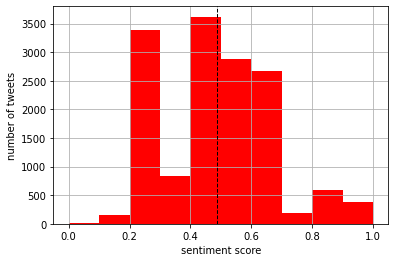

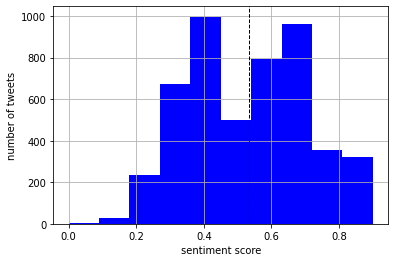

In [ ]:
plt.hist(trump_df.tweet_score, color='red')
plt.xlabel('sentiment score')
plt.ylabel('number of tweets')
plt.grid()
plt.axvline(trump_df.tweet_score.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

plt.hist(biden_df.tweet_score, color='blue')
plt.xlabel('sentiment score')
plt.ylabel('number of tweets')
plt.grid()
plt.axvline(biden_df.tweet_score.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

For this analysis, we will be using a 0.5 sentiment score as a threshold for a positive or negative tweet. A tweet score that is less than 0.5 is "negative", a tweet score that is more than 0.5 is "positive" and a tweet score that is exactly 0.5 is "neutral". 

First, Donald Trump has a mean tweet score of 0.49 and a median tweet score of 0.46. This is very close to neutral so we can assume that Twitter has a neutral environment towards Trump. However, the shape of the curve also tells a more in-depth story. In contrast, Joseph Biden Jr. has a mean tweet score of 0.53 and a median tweet score of 0.54. This is slightly above neutral so we can assume that Twitter has slightly positive environment towards Biden.

Secondly, the shape of each candidate's histograms tells a slightly different story. Trump has over 3,400 tweets with a score of 0.2 or very negative, over 5,000 tweets between 0.5 to 0.7 (aka. slightly positive), and less than 1,000 tweets between 0.7 and 1 (aka. very positive). In contrast, Biden has slightly over 200 tweets that are very negative,over 1,500 tweets that are slightly negative, and has more tweets that Trump that are labeled slightly positive and very positive. Therefore, Twitter is a more negative environment for Trump and a more positive environment for Biden if we compare these candidates based on their tweet score distributions. 

**2) How many supporters can you estimate for each one among these twitter users?**

In [ ]:
positive_trump_tweets = trump_df.loc[(trump_df['tweet_score'] >= 0.7)]
positive_trump_tweets
positive_trump_tweets['user_id'].unique().shape

(1696,)

In [ ]:
negative_biden_tweets = biden_df.loc[(biden_df['tweet_score'] <= 0.3)]
negative_biden_tweets['user_id'].unique().shape

(580,)

In [ ]:
print("Trump Supporters Estimate:", 1696+580)
print("Percentage:", (2276 / 128153)*100)

Trump Supporters Estimate: 2276
Percentage: 1.7760021224629934


In [ ]:
positive_biden_tweets = biden_df.loc[(biden_df['tweet_score'] >= 0.7)]
positive_biden_tweets
positive_biden_tweets['user_id'].unique().shape

(988,)

In [ ]:
negative_trump_tweets = trump_df.loc[(trump_df['tweet_score'] <= 0.3)]
negative_trump_tweets
negative_trump_tweets['user_id'].unique().shape

(2250,)

In [ ]:
print("Biden Supporters Estimate:", 988+2250)
print("Percentage:", (3238 / 128153)*100)

Biden Supporters Estimate: 3238
Percentage: 2.52666734294164


The method we are using to estimate how many of the Twitter users are either Trump or Biden supporters is:



*   For Trump: filter tweets about Trump that are very positive (>= 0.7) and filter tweets about Biden that are very negative (<= 0.3) 
*   For Biden: filter tweets about Biden that are very positive (>= 0.7) and filter tweets about Trump that are very negative (<= 0.3). 

To ensure we were not counting the same supporter twice, we filtered by unique user ids. We also filtered out tweets that do not mention Trump or Biden, or mention both Trump and Biden in the same tweet so they are easier to classify. Additionally, the reason we chose these extreme tweet scores to estimate candidate support is because supporters can critique their preferred candidate and praise their unpreferred candidate. Thus, it would not reflect reality if we assumed that supporters only praised their candidate and only critiqued their unpreferred candidate. 

Using this method, we estimate that 2,276 (1.76%) of the twitter users in this sample are clearly Trump supporters and 3,238 (2.53%) of the twitter users in this sample are clearly Biden supporters. 



**3) Analyze popularity of each candidate throughout the two months period**

In [ ]:
from matplotlib.pyplot import figure

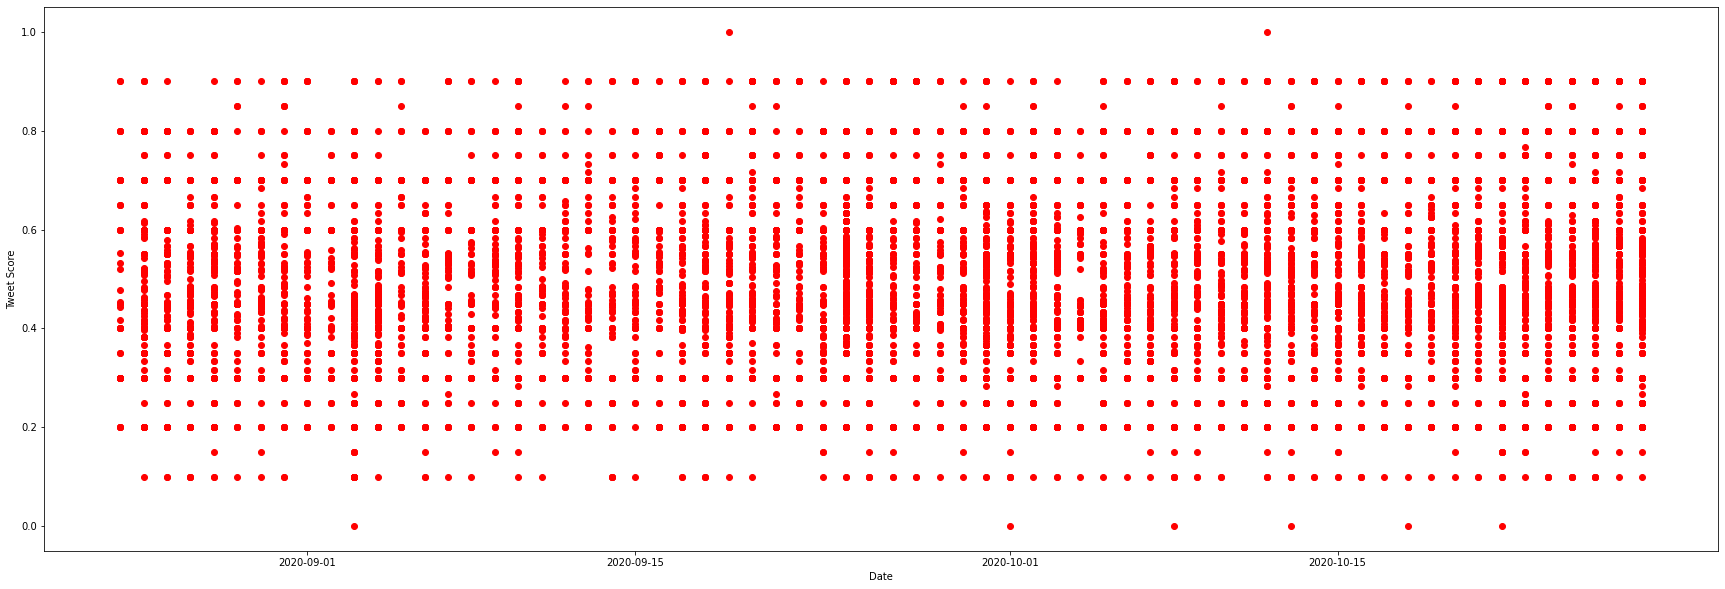

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
plt.scatter(trump_df['date'], trump_df['tweet_score'], color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Tweet Score')

plt.show()

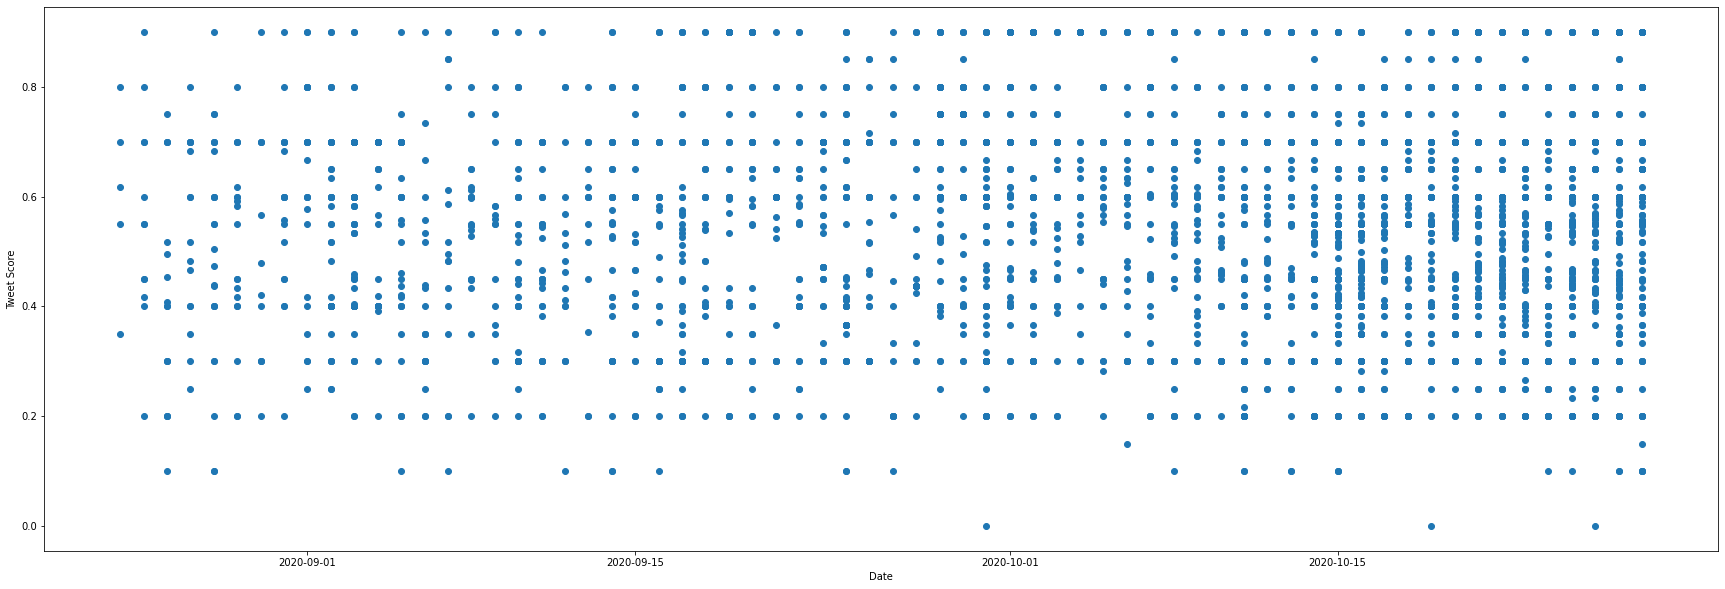

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
plt.scatter(biden_df['date'], biden_df['tweet_score'])
ax.set_xlabel('Date')
ax.set_ylabel('Tweet Score')

plt.show()

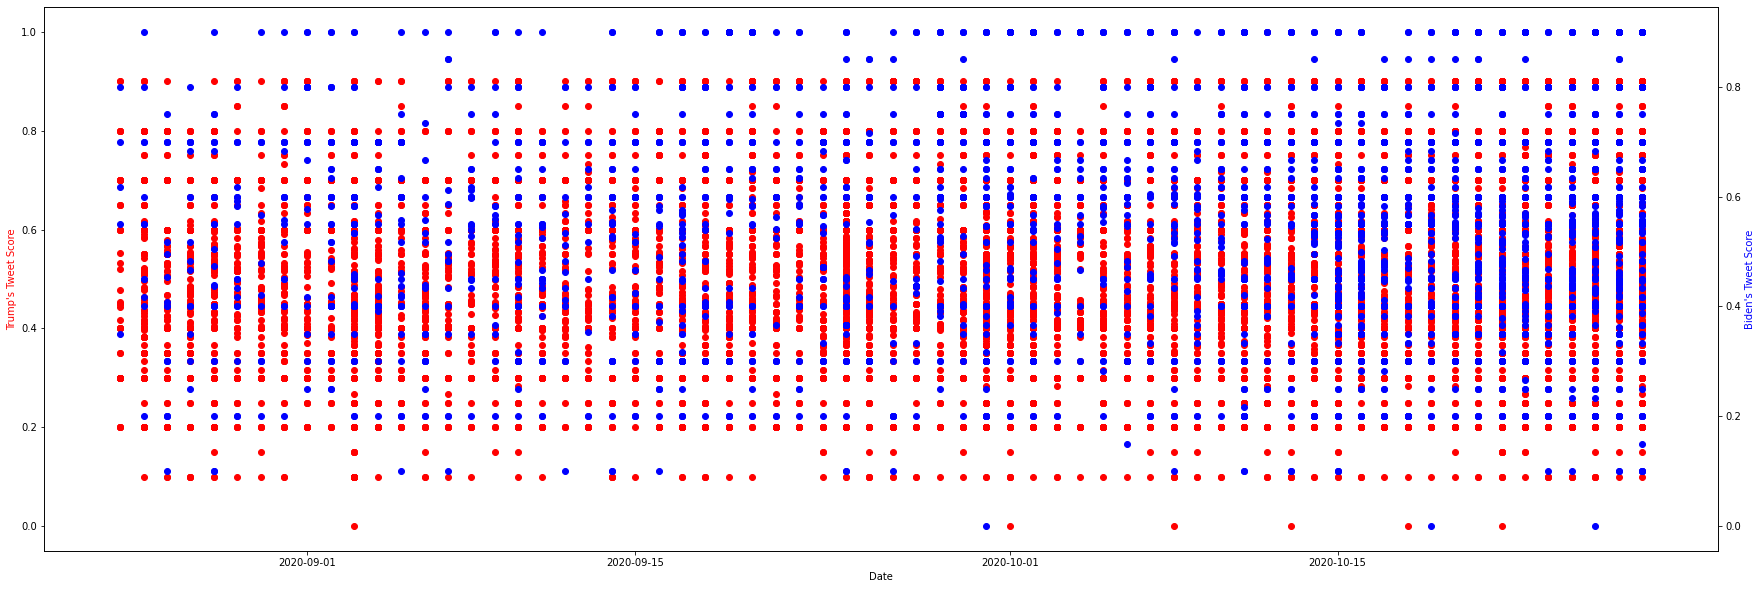

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
plt.scatter(trump_df['date'], trump_df['tweet_score'], color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Trump\'s Tweet Score', color='red')

ax2=ax.twinx()
plt.scatter(biden_df['date'], biden_df['tweet_score'], color='blue')
ax2.set_ylabel('Biden\'s Tweet Score', color='blue')


plt.show()

In [ ]:
import seaborn as sns 

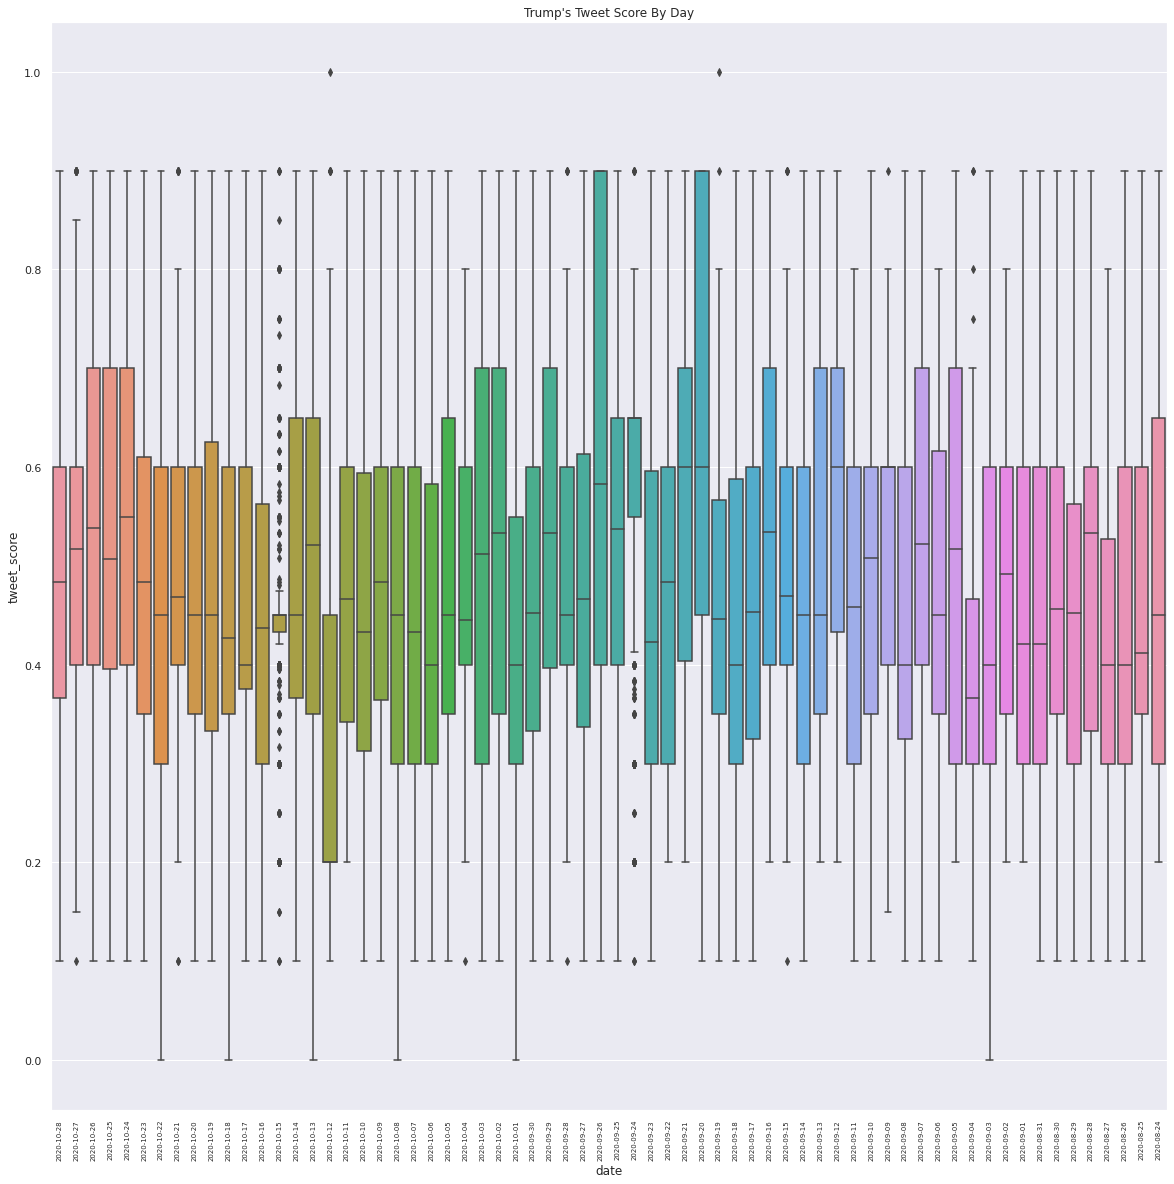

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize': (20, 20)})
sns.boxplot(data=trump_df, x="date", y="tweet_score").set_title("Trump's Tweet Score By Day")
plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=7)
plt.show()

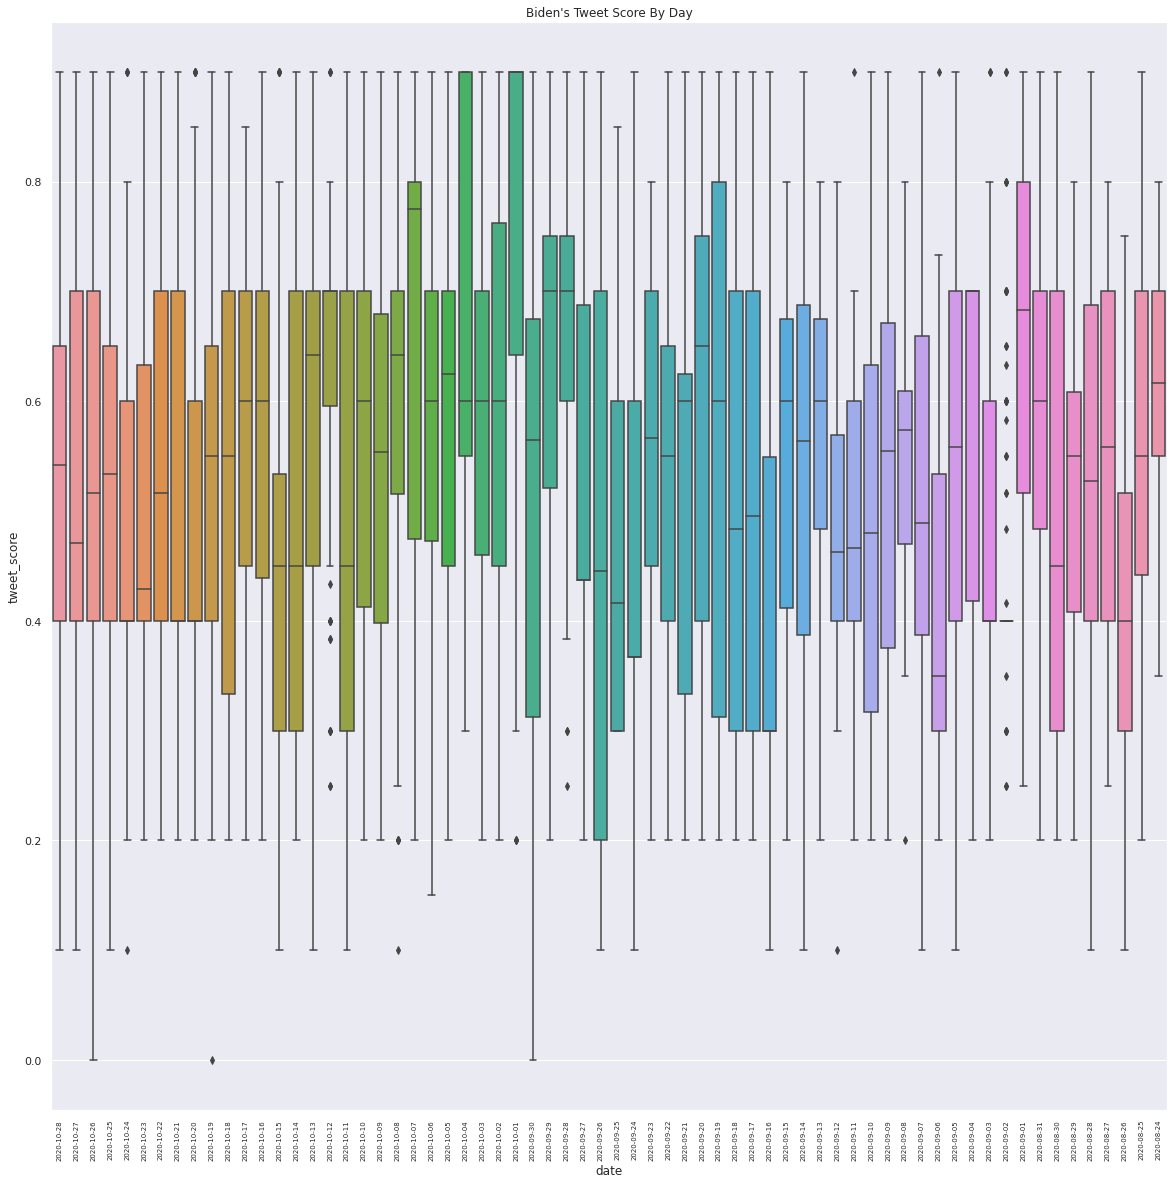

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize': (20, 20)})
sns.boxplot(data=biden_df, x="date", y="tweet_score").set_title("Biden's Tweet Score By Day")
plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=7)
plt.show()

***Trump***

Examining Trump's median popularity over a two month period stayed fairly constant between a tweet score of 0.4 and 0.6 between August 24th to October 28th, 2020. This may explain why Trump's average tweet score is 0.49 and a median tweet score of 0.46. In fact, Trump's median tweey score does not signiciantly change between August 24th and October 28th. However, there are a few significant fluctations. I will now examine a few outliers to understand what events may have led to these fluctations. 

On September 3rd, 2020, Trunp's median popularity score drops below 0.4 before it jumps back to above 0.5 the next day. This is because Trump missed his self-announced deadline that Americans earning less than $104,000 per year could delay paying their Social Securities Tax. 

On September 20th to September 21st, Trump's median tweet score jumps to 0.6, but then sharply decreases back to just above 0.5 by September 22nd. These two days are when Trump annnounced his Tik Tok ban to the public. 

On October 7th, Trump's median tweet score jumps to its peak of 0.8. There are very few negative Trump tweets during this day. This is when Trump announced that he had recovered from COVID-19 after being hospitalized. 

On October 13th to October 14th, Trump's median tweet score drops to 0.45. This is when Trump tested negative for COVID-19 and held his first campaign rally after being diagnosed with the disease. 

From October 17th to October 28th, Trump's median tweet score gradually increases from below 0.4 back to 0.49. Trump is holding more rallies leading up to the election. 

***Biden***

In contrast to Trump, Biden's median tweet score heavily fluctuates and never really stabilizes. His mean tweet score fluctuates between 0.4 and 0.7. Biden's median tweet score starts on August 24th above 0.6 and drops by October 28th at 0.54. 

Between August 28th to October 17th, Biden's median tweet score continually rose and fell before becoming more stable by October 18th. During this period, the lowest median score Biden has is on September 6th at less than 0.4. This is a day after Biden released that his campaign "is going to end fossil fuels". The comment was labeled "patronizing" by AOC and "un-American" by Mitch McConnell. Furthermore, Biden's highest tweet score during this period is on October 1st. This is the day after Biden and Trump's first debate. 

Between October 19th to October 28th, Biden's median score begins to stabilize. Although the median continues to fluctuate, it is no longer dropping below 0.4 and his highest median score is 0.54. Similiar to Trump, Biden was attending rallies and focusing on his media presence. During this time, he retweeted his May 2019 tweet saying "our current leadership is not prepared for a pandemic", interviewed with 60 minutes, and attended rallies with Barack Obama in swing states. 



# **Part D:**

In [ ]:
from PIL import Image

In [ ]:
trump_df['bag_of_words'] = trump_df.bag_of_words.astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import re
trump_df['bag_of_words'] = trump_df['bag_of_words'].str.replace(r'[-./?!,":;()\']',' ')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
biden_df['bag_of_words'] = biden_df.bag_of_words.astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
biden_df['bag_of_words'] = biden_df['bag_of_words'].str.replace(r'[-./?!,":;()\']',' ')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

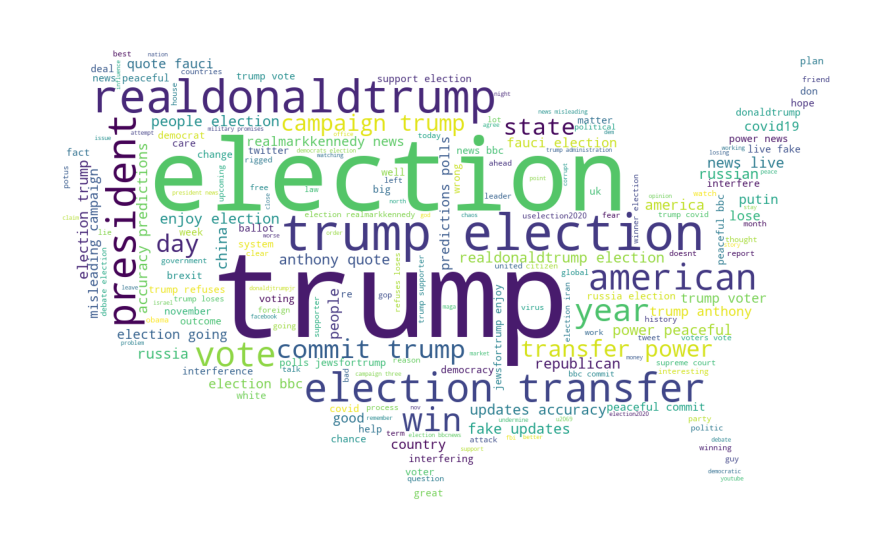

In [ ]:
text = (" ").join(trump_df.bag_of_words)
usa_mask = np.array(Image.open("/content/Screen Shot 2020-11-15 at 1.59.47 PM.png"))

stopwords.update(["realdonaltrump election", "uselection", "trump election", "dont", "donald", "amp"])

wordcloud = WordCloud(stopwords=stopwords, mask=usa_mask, background_color="white").generate(text)

import matplotlib.pyplot as mpLib
%matplotlib inline 
mpLib.figure(figsize=(20,10))
mpLib.imshow(wordcloud)
mpLib.axis("off")
mpLib.show()

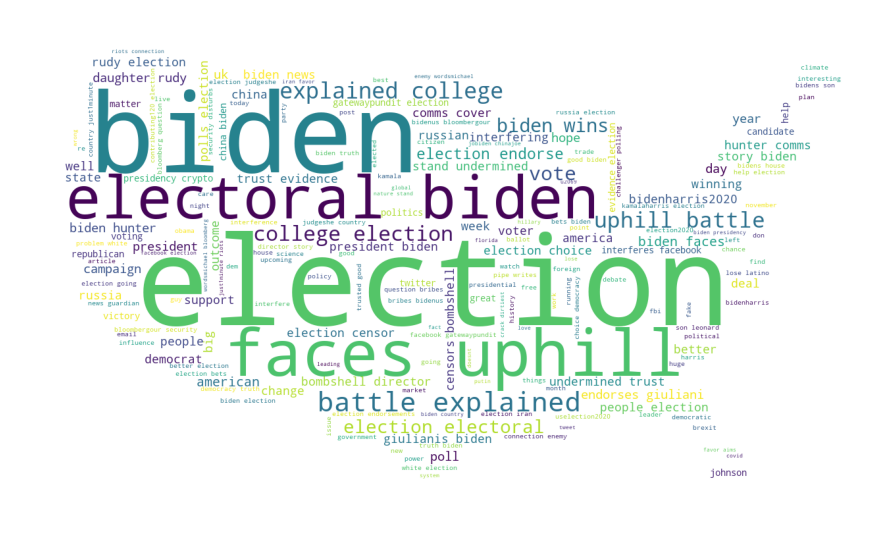

In [ ]:
text = (" ").join(biden_df.bag_of_words)
usa_mask = np.array(Image.open("/content/Screen Shot 2020-11-15 at 1.59.47 PM.png"))

stopwords.update(["joebiden", "amp", "joe", "dont"])

wordcloud = WordCloud(stopwords=stopwords, mask=usa_mask, background_color="white").generate(text)

import matplotlib.pyplot as mpLib
%matplotlib inline 
mpLib.figure(figsize=(20,10))
mpLib.imshow(wordcloud)
mpLib.axis("off")
mpLib.show()